In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import koopomics as ko

In [2]:
embedding_model = ko.FF_AE([264,100,100,20], [20,100,100,264])
operator_model = ko.LinearizingKoop(linearizer=ko.FFLinearizer([20,30,40], [40,30,20]), koop=ko.InvKoop(latent_dim=40))

TestingKoop = ko.KoopmanModel(embedding=embedding_model, operator=operator_model)


Model loaded with:
FF_AE module
LinearizingKoop module
An invertible Koop


In [5]:
param_path = '/Users/daviddornig/Documents/Master_Thesis/Bioinf/Code/philipp-trinh/KOOPOMICS/model_states/TestingKoop.pth'
TestingKoop.load_state_dict(torch.load(param_path))

<All keys matched successfully>

In [13]:
bwdmatrix, fwdmatrix = TestingKoop.kmatrix()
bwdM = bwdmatrix.detach()
fwdM = fwdmatrix.detach()
fwdinv = np.linalg.inv(fwdM)

In [14]:
B, F = bwdM, fwdM


K = F.shape[-1]
loss_inv_cons = 0
for k in range(1,K+1):
    Fs1 = F[:,:k]
    Bs1 = B[:k,:]
    Fs2 = F[:k,:]
    Bs2 = B[:,:k]

    Ik = torch.eye(k).float()#.to(device)

    loss_inv_cons += (torch.sum((torch.matmul(Bs1, Fs1) - Ik)**2) + \
                         torch.sum((torch.matmul(Fs2, Bs2) - Ik)**2) ) / (2.0*k)

loss_inv_cons

tensor(3.2234e-06)

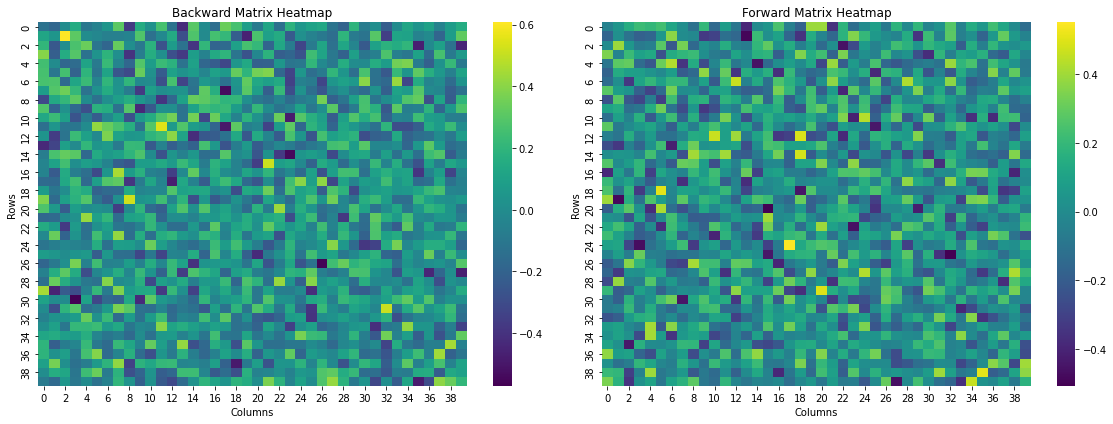

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# First heatmap (for bwdM)
sns.heatmap(bwdM, annot=False, fmt=".2f", cmap='viridis', ax=ax1)
ax1.set_title('Backward Matrix Heatmap')
ax1.set_xlabel('Columns')
ax1.set_ylabel('Rows')

# Second heatmap (for fwdM)
sns.heatmap(fwdM, annot=False, fmt=".2f", cmap='viridis', ax=ax2)
ax2.set_title('Forward Matrix Heatmap')
ax2.set_xlabel('Columns')
ax2.set_ylabel('Rows')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the subplots
plt.show()


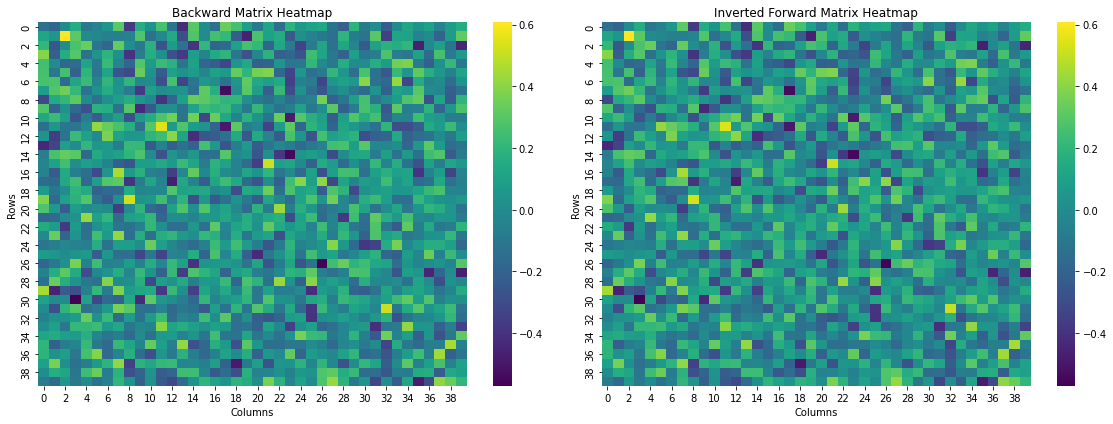

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# First heatmap (for bwdM)
sns.heatmap(bwdM, annot=False, fmt=".2f", cmap='viridis', ax=ax1)
ax1.set_title('Backward Matrix Heatmap')
ax1.set_xlabel('Columns')
ax1.set_ylabel('Rows')

# Second heatmap (for fwdM)
sns.heatmap(fwdinv, annot=False, fmt=".2f", cmap='viridis', ax=ax2)
ax2.set_title('Inverted Forward Matrix Heatmap')
ax2.set_xlabel('Columns')
ax2.set_ylabel('Rows')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the subplots
plt.show()


In [11]:
eigenvalues, eigenvectors = np.linalg.eig(fwdM)
print("FWD Matrix:")
print(fwdM)
print("\nEigenvalues:")
print(list(eigenvalues))
print("\nEigenvectors:")
print(list(eigenvectors))

FWD Matrix:
tensor([[-0.0374,  0.0452,  0.1497,  ...,  0.1210, -0.0044, -0.1316],
        [-0.1705,  0.0192, -0.1057,  ...,  0.2984,  0.0615, -0.0341],
        [ 0.0025,  0.3915,  0.0511,  ...,  0.0387,  0.0107,  0.0583],
        ...,
        [ 0.0334, -0.1096, -0.0617,  ...,  0.2678, -0.2764,  0.3984],
        [ 0.2051,  0.1877, -0.3117,  ..., -0.1421,  0.1076,  0.3721],
        [ 0.3385,  0.1667, -0.3458,  ...,  0.0893, -0.0800,  0.1691]])

Eigenvalues:
[(-1.2654455+0.12814827j), (-1.2654455-0.12814827j), (-0.9968005+0.5075129j), (-0.9968005-0.5075129j), (-0.89531934+0.6175347j), (-0.89531934-0.6175347j), (-1.0348928+0.20366774j), (-1.0348928-0.20366774j), (-0.9785823+0j), (-0.8481329+0j), (-0.49221867+0.98940504j), (-0.49221867-0.98940504j), (-0.53967917+0.57441753j), (-0.53967917-0.57441753j), (-0.25959268+0.9933998j), (-0.25959268-0.9933998j), (-0.3794998+0.8086568j), (-0.3794998-0.8086568j), (0.15864618+1.0486517j), (0.15864618-1.0486517j), (0.08143849+0.911133j), (0.08143849-0.9

In [12]:
eigenvalues, eigenvectors = np.linalg.eig(bwdM)
print("BWD Matrix:")
print(bwdM)
print("\nEigenvalues:")
print(list(eigenvalues))
print("\nEigenvectors:")
print(list(eigenvectors))

BWD Matrix:
tensor([[-0.1265, -0.1806, -0.0028,  ..., -0.0541,  0.0777,  0.1530],
        [ 0.1207,  0.0446,  0.6074,  ..., -0.1888,  0.0765,  0.3192],
        [ 0.2069, -0.2502,  0.0018,  ...,  0.0929, -0.1222, -0.4439],
        ...,
        [ 0.0933,  0.3598,  0.0100,  ...,  0.2621, -0.0545,  0.1080],
        [ 0.0012,  0.1601,  0.1245,  ..., -0.2298,  0.1376,  0.0985],
        [-0.0857, -0.1694,  0.0516,  ...,  0.4059,  0.3340,  0.2048]])

Eigenvalues:
[(0.95980024+0.6062121j), (0.95980024-0.6062121j), (0.9985981+0.011268533j), (0.9985981-0.011268533j), (0.9802665+0.21247186j), (0.9802665-0.21247186j), (0.93027556+0.34608763j), (0.93027556-0.34608763j), (0.84705704+0.5744921j), (0.84705704-0.5744921j), (0.78258246+0.78939486j), (0.78258246-0.78939486j), (0.4891468+1.0229342j), (0.4891468-1.0229342j), (0.6512868+0.778969j), (0.6512868-0.778969j), (0.35076553+0.9213341j), (0.35076553-0.9213341j), (0.09743219+1.0889208j), (0.09743219-1.0889208j), (0.14100687+0.9322473j), (0.14100687-0.